### Machine Learning Class 1

In [1]:
''' Import all library '''
import pandas as pd
import numpy as np
import os 

In [2]:
''' Dataset Path '''

Root_Path = 'C:\\Users\\mdmes\\OneDrive\\Desktop\\Pandas Data'
Data_Path = os.path.join(Root_Path, 'house_data.csv')

house_data=pd.read_csv(
    Data_Path 
)

house_data.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


### Step-1: Parameter / Weight initialization

In [3]:
per_score_price = np.random.randint(1,1000000)
registration_cost = np.random.randint(1,1000000)

print(per_score_price)
print(registration_cost)

972232
364154


### Step-2: Define ML Algoritham

In [4]:
def house_price(area, per_score_price, registration_cost):
    predict_price = (area * per_score_price) + registration_cost
    return predict_price

house_price(
    area=7420,
    per_score_price=per_score_price,
    registration_cost=registration_cost
)

7214325594

### Step-3: Predict the result

In [5]:
house_data['Predicted_Price'] = house_data['area'].apply(
    lambda area : house_price(
        area=area,
        per_score_price=per_score_price,
        registration_cost=registration_cost
    )
)

house_data.head()

,area,price,Predicted_Price
0,7420,13300000,7214325594
1,8960,12250000,8711562874
2,9960,12250000,9683794874
3,7500,12215000,7292104154
4,7420,11410000,7214325594


### Step-4: Compaire Actual result to predicted result by Plot

In [6]:
x = []
y = [] 
y_true = []

for i in range(len(house_data)):
    x.append(house_data['area'].iloc[i])
    y.append(house_data['price'].iloc[i])
    y_true.append('y-True')

    x.append(house_data['area'].iloc[i])
    y.append(house_data['Predicted_Price'].iloc[i])
    y_true.append('y_predict')

house_data = pd.DataFrame({
    'area':np.array(x),
    'price':np.array(y),
    'Predicted_Price':np.array(y_true)
})

house_data.head()

,area,price,Predicted_Price
0,7420,13300000,y-True
1,7420,7214325594,y_predict
2,8960,12250000,y-True
3,8960,8711562874,y_predict
4,9960,12250000,y-True


In [7]:
import seaborn as sns


C:\Users\mdmes\AppData\Local\Temp\ipykernel_10528\3597278603.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


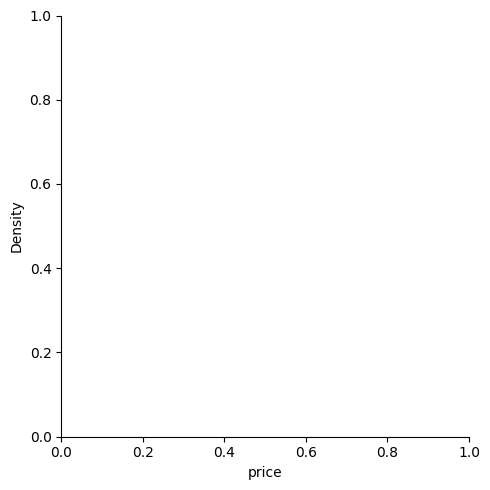

In [8]:
sns.displot(
    data=house_data.query("Predicted_Price == 'y_true'"),
    x='price',
    kind='kde',
    fill=True
)

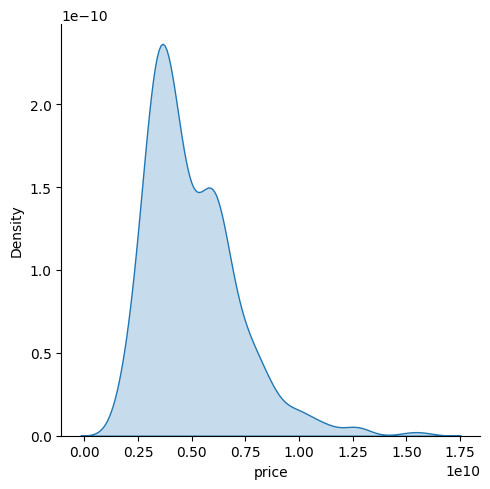

In [9]:
sns.displot(
    data=house_data.query("Predicted_Price == 'y_predict'"),
    x='price',
    kind='kde',
    fill=True
)

In [12]:
''' KL Divergence '''


' KL Divergence '